Stock Prediction Using Deep Learning(LSTM)

In [1]:
#important library
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from datetime import datetime


In [2]:
# Function to get stock data
def get_stock_data(symbol, start_date="2010-01-01", end_date=datetime.today().strftime('%Y-%m-%d')):
    df = yf.download(symbol, start=start_date, end=end_date)
    return df[['Close']]  # Keeping only the 'Close' price

In [3]:
# Example usage
stock_symbol = "AAPL"  # You can change this to any stock
df = get_stock_data(stock_symbol)
df.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,AAPL
Date,
2010-01-04,6.440330
2010-01-05,6.451464
2010-01-06,6.348848
2010-01-07,6.337111
2010-01-08,6.379241


In [4]:
# Scale data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df)


In [5]:
# Create sequences for LSTM
def create_sequences(data, time_steps=60):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

time_steps = 60
X, y = create_sequences(df_scaled, time_steps)

In [6]:
# Train-test split (80% train, 20% test)
split_ratio = 0.8
split = int(split_ratio * len(X))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

In [7]:
print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")

Train size: (3000, 60, 1), Test size: (751, 60, 1)


In [8]:
# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_steps, 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

c:\Users\91977\OneDrive\Desktop\Quant_Projects\myenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

In [10]:
# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0075 - val_loss: 0.0012
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 1.1571e-04 - val_loss: 6.7328e-04
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 9.5424e-05 - val_loss: 6.6731e-04
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 8.8017e-05 - val_loss: 8.5784e-04
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 8.2227e-05 - val_loss: 6.1003e-04
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 9.3823e-05 - val_loss: 5.9407e-04
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 9.6281e-05 - val_loss: 5.4992e-04
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 8.5999e-05 - val_loss: 5.2562e-04
Epoch 9/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 8.4476e-05 - val_loss: 7.3226e-04
Epoch 10/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 6.9691e-05 - val_loss: 5.1669e-04
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 6.9559e-05 - val

In [11]:
# Predict on test data
predictions = model.predict(X_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


In [12]:
# Reverse scaling for actual comparison
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

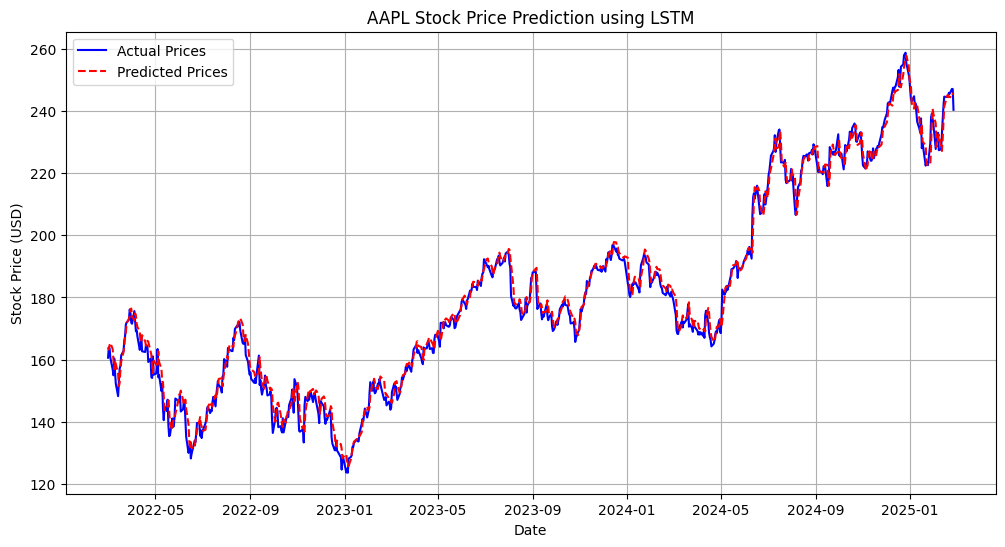

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df.index[-len(y_test_actual):], y_test_actual, label="Actual Prices", color='blue')
plt.plot(df.index[-len(predictions):], predictions, label="Predicted Prices", color='red', linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title(f"{stock_symbol} Stock Price Prediction using LSTM")
plt.legend()
plt.grid()
plt.show()


In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test_actual, predictions)
mae = mean_absolute_error(y_test_actual, predictions)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")


Mean Squared Error (MSE): 10.74
Mean Absolute Error (MAE): 2.51


In [15]:
# Predict next 30 days
future_days = 30
future_predictions = []


In [20]:
# Start with last known time steps
last_60_days = df_scaled[-time_steps:].reshape(1, time_steps, 1)



In [21]:
for _ in range(future_days):
    next_pred = model.predict(last_60_days)[0][0]  # Get scalar value
    
    future_predictions.append(next_pred)  # Store prediction

    # Convert prediction to 3D format and update last_60_days
    next_pred = np.array([[next_pred]])  # Convert to 2D
    last_60_days = np.append(last_60_days[:, 1:, :], next_pred.reshape(1, 1, 1), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━

In [22]:
# Reverse scale future predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))


In [24]:
from datetime import timedelta
# Create future dates
last_date = df.index[-1]
future_dates = [last_date + timedelta(days=i) for i in range(1, future_days + 1)]


In [28]:
print("Future Predictions Shape:", future_predictions.shape)
print("Future Dates Shape:", len(future_dates))

Future Predictions Shape: (62, 1)
Future Dates Shape: 30


In [29]:
# Convert future predictions to 1D and ensure only 30 elements
future_predictions = np.array(future_predictions[:30]).flatten()


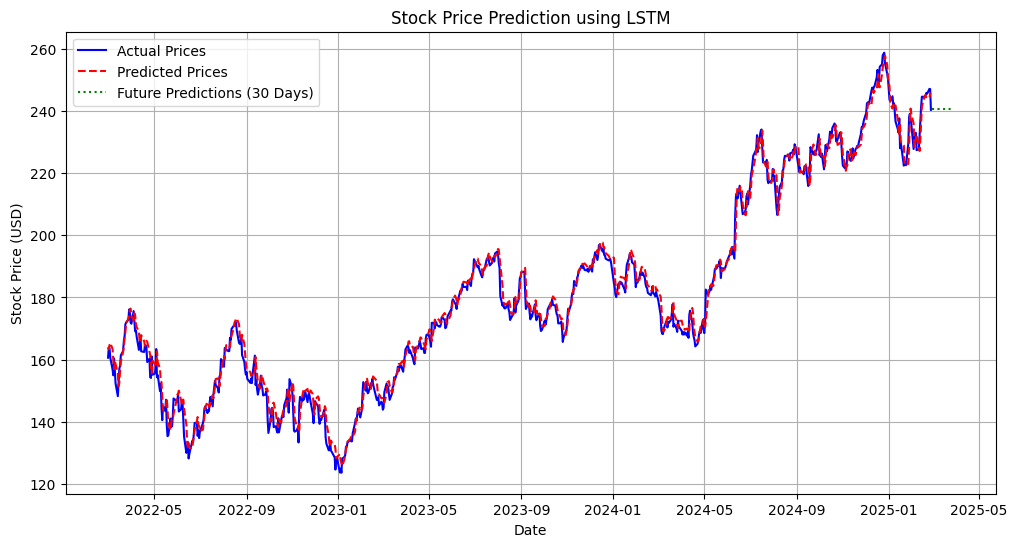

In [30]:
plt.figure(figsize=(12,6))
plt.plot(df.index[-len(y_test_actual):], y_test_actual, label="Actual Prices", color='blue')

plt.plot(df.index[-len(predictions):], predictions, label="Predicted Prices", color='red', linestyle='dashed')

plt.plot(future_dates[:30], future_predictions, label="Future Predictions (30 Days)", color='green', linestyle='dotted')

# Labels and title
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title(f"Stock Price Prediction using LSTM")
plt.legend()
plt.grid()
plt.show()


In [31]:
print(future_predictions)

[240.54858 240.54858 240.54858 240.54858 240.54858 240.54858 240.54858
 240.54858 240.54858 240.54858 240.54858 240.54858 240.54858 240.54858
 240.54858 240.54858 240.54858 240.54858 240.54858 240.54858 240.54858
 240.54858 240.54858 240.54858 240.54858 240.54858 240.54858 240.54858
 240.54858 240.54858]
